### Gabriel Ábrahám
### Ákos Lévárdy
### Percentage of work: 50%/50%
### Dataset: 81

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy
import scipy.stats as stats

## Analysis of data structure
### Importing the dataset.. Reading the .csv files

- We have 3 .csv files which are seperated with tabulators.
- The files provide information about users, their shopping sessions and about the shop they've visited.



In [11]:
productData = pd.read_csv("dataset/product.csv",sep="\t")

In [12]:
print(f"Number of records: {productData.shape[0]}\nNumber of attributes: {productData.shape[1]}")

Number of records: 14975
Number of attributes: 4


In [13]:
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14975 non-null  object
 1   product_ean  14975 non-null  int64 
 2   code         14960 non-null  object
 3   store_name   14975 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.1+ KB


In [14]:
userData = pd.read_csv("dataset/user.csv",sep="\t")

In [15]:
print(f"Number of records: {userData.shape[0]}\nNumber of attributes: {userData.shape[1]}")

Number of records: 2525
Number of attributes: 11


In [16]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               1263 non-null   object
 1   residence         884 non-null    object
 2   username          2525 non-null   object
 3   user_id           2525 non-null   int64 
 4   address           2146 non-null   object
 5   current_location  2399 non-null   object
 6   registration      2525 non-null   object
 7   race              757 non-null    object
 8   name              2525 non-null   object
 9   birthdate         1389 non-null   object
 10  mail              2525 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.1+ KB


In [17]:
sessionData = pd.read_csv("dataset/session.csv",sep="\t")

In [18]:
print(f"Number of records: {sessionData.shape[0]}\nNumber of attributes: {sessionData.shape[1]}")

Number of records: 11107
Number of attributes: 25


 - In the info we see that sessionData has string object columns. That's a problem in the data so we need to convert it to something reasonable

In [19]:
sessionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_click_product_info          11096 non-null  float64
 1   user_id                         11107 non-null  int64  
 2   screen_height                   11107 non-null  object 
 3   pct_scroll_move_duration        11096 non-null  float64
 4   scroll_move_total_rel_distance  11096 non-null  float64
 5   pct_click                       11096 non-null  float64
 6   pct_scrandom                    11095 non-null  float64
 7   pct_wild_mouse                  11096 non-null  float64
 8   session_id                      11107 non-null  int64  
 9   browser_name                    11107 non-null  object 
 10  pct_input                       11096 non-null  float64
 11  screen_width                    11107 non-null  object 
 12  mouse_move_total_rel_distance   

## User Data

- Unifying dates in registration column and setting it as the DataFrame index

In [20]:
userData["registration"] = userData["registration"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))

In [21]:
userData = userData.sort_values(by="registration")
userData.set_index("registration", inplace=True)

In [22]:
userData.head(10)

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,F,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",NaN,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,F,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",NaN,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,F,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",NaN,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,M,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",NaN,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,F,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",NaN,前田 真綾,NaN,sayuri12@hotmail.com
2013-10-09,NaN,福島県西多摩郡檜原村芝大門7丁目22番6号 丹勢シティ500,yasuhiro03,503,鹿児島県横浜市緑区吾妻橋38丁目9番18号 コーポ元浅草783,"(Decimal('27.9412735'), Decimal('-156.530493'))",NaN,松本 康弘,NaN,cnakamura@gmail.com
2013-10-10,NaN,Stefan-Siering-Gasse 08\r\n72596 Düren,niemeiergretl,481,Patric-Heidrich-Straße 2/2\r\n82727 Gotha,"(Decimal('-36.4387955'), Decimal('56.052913'))",NaN,Wieland Schleich,1971-07-11,matoroehrdanz@gmail.com
2013-10-11,F,NaN,yutakato,1694,高知県武蔵村山市虎ノ門虎ノ門ヒルズ森タワー9丁目19番14号 クレスト東三島446,"(Decimal('-30.6729475'), Decimal('150.053937'))",NaN,松本 くみ子,1945-09-22,takahashirei@gmail.com
2013-10-13,NaN,NaN,jpokorna,916,Mádrova 6\r\n219 39 Miletín,"(Decimal('89.3748045'), Decimal('-134.609984'))",NaN,Milan Svoboda,1967-12-21,vavrovaradka@gmail.com


- Checking if the email addresses have correct format

In [23]:
import re

# ([^\s]+)@  any character except a whitespace at least once for the username followed by @
# ([^\s]+)\. any character except a whitespace at least once for the domain name(until the dot) followed by a dot
# ([^\s]){2,3} any character except a whitespace 2-3 times to finish the domain name
check = [address for address in userData.mail if not re.match("^([^\s]+)@([^\s]+)\.([^\s]){2,3}$", address)]
# empty list means all the addresses are correct
check

[]

- Setting NaNs in race column to "unspecified" cause the column already contains those

In [24]:
uniques = list(userData.race.unique())
for i in uniques:
    if type(i) == float:
        uniques.remove(i)
        break
userData.race = ["unspecified" if race not in uniques else race for race in userData.race]

- Number of NaNs in each column
- A large part of the DataFrame consists of rows that contain at least one NaN so for now we wont drop them

In [25]:
for column in userData.columns:
    if (nans := userData[column].isna().sum()) > 0:
        print(f"{column}: {nans}")

sex: 1262
residence: 1641
address: 379
current_location: 126
birthdate: 1136


In [26]:
print(f"Number of duplicate records: {userData[userData.duplicated].shape[0]}")

Number of duplicate records: 0


## Product Data

productData has rows with NaN, we will delete them

In [27]:
productData.isna().sum()

location        0
product_ean     0
code           15
store_name      0
dtype: int64

In [28]:
productData = productData.dropna()

In [29]:
productData = productData.reset_index().drop("index",axis=1)

In [30]:
print(f"Number of duplicate records: {productData[productData.duplicated].shape[0]}")

Number of duplicate records: 0


## Session Data

- session_start should be a timestamp so we use to_datetime() to convert it

In [31]:
sessionData["session_start"] = pd.to_datetime(sessionData["session_start"])

- Replacing ack 1/0 values with True/False

In [32]:
a = [bool(val) for val in sessionData["ack"]]
sessionData["ack"] = a

- Replacing higher/lower in screen height/width columns with the max and min values of the columns (higher = max , lower = min)

In [33]:
heights = [int(i) for i in sessionData.screen_height.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(heights),"higher": max(heights)}

sessionData.screen_height = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_height"] ]

In [34]:
widths = [int(i) for i in sessionData.screen_width.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(widths),"higher": max(widths)}

sessionData.screen_width = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_width"]]

- Replacing browser names with numbers from 0 to 6

In [35]:
browsers = {k:v for k,v in zip(sessionData.browser_name.unique(), range(len(sessionData.browser_name.unique())))}
print(browsers)

{'firefox': 0, 'edge': 1, 'chrome': 2, 'mobile': 3, 'safari': 4, 'opera': 5, 'other': 6}


In [36]:
sessionData.browser_name = [browsers.get(browser) for browser in sessionData.browser_name]

- Sorting the data by date and set the date as the index

In [37]:
sessionDataByDate = sessionData.sort_values(by="session_start")

In [38]:
sessionDataByDate.set_index("session_start", inplace=True)

### Duplicate records in sessionData

In [39]:
print(f"Number of duplicate records: {sessionDataByDate[sessionDataByDate.duplicated].shape[0]}")

Number of duplicate records: 132


### NaNs

- We check how many NaNs there are, and then remove them

In [40]:
sessionDataByDate.isna().sum()

pct_click_product_info            11
user_id                            0
screen_height                      0
pct_scroll_move_duration          11
scroll_move_total_rel_distance    11
pct_click                         11
pct_scrandom                      12
pct_wild_mouse                    11
session_id                         0
browser_name                       0
pct_input                         11
screen_width                       0
mouse_move_total_rel_distance     11
pct_mouse_click                   11
wild_mouse_duration               11
pct_mouse_move                    11
pct_doubleclick                   12
pct_rage_click                    11
ack                                0
page_activity_duration            11
total_load_time                    0
pct_scroll_move                   11
product_ean                        0
session_duration                   0
dtype: int64

In [41]:
sessionDataByDate = sessionDataByDate.dropna()

### Outliers in sessionData

<Axes: xlabel='ack', ylabel='total_load_time'>

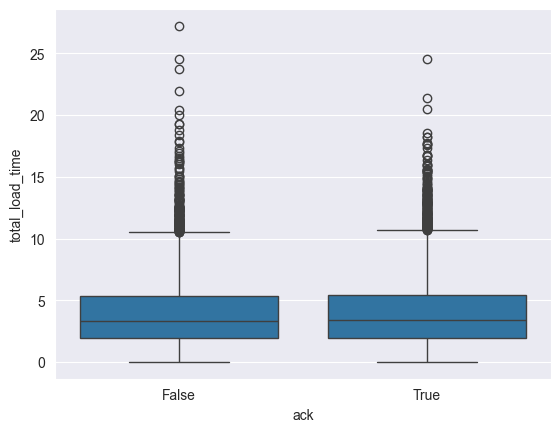

In [42]:
sns.boxplot(sessionDataByDate,x="ack", y="total_load_time")

In [43]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]



In [44]:
out = identify_outliers(sessionDataByDate["total_load_time"])
out


session_start
2018-10-01 05:21:22    12.27116
2018-10-03 06:33:39    14.15039
2018-10-29 21:46:48    12.21505
2018-10-31 16:08:12    15.41455
2018-11-02 11:11:46    11.65693
                         ...   
2023-08-30 07:01:55    12.60234
2023-09-06 20:40:06    17.36514
2023-09-08 17:47:34    10.80338
2023-09-10 04:33:58    12.59038
2023-09-20 14:09:01    11.19539
Name: total_load_time, Length: 340, dtype: float64

### Other problems
- session_duration has values that are negative which doesn't make sense

In [45]:
print(f"Negatives in session duration: {sessionDataByDate[sessionDataByDate['session_duration'] < 0].shape[0]}")

Negatives in session duration: 67


In [46]:
sessionDataByDate = sessionDataByDate.dropna()

## Basic descriptive statistics and Shapiro-Wilk test for Normal(Gaussian) Distribution

- H₀ : The data is normally distributed.
- H₁ : The data is not normally distributed

In [47]:
def normalityTest(shapiro):
    if shapiro.pvalue > 0.05:
        print(f"{shapiro.pvalue} > 0.05 >> Fail to Reject H0; data is normally distributed")
    else:
        print(f"{shapiro.pvalue} < 0.05 >> Reject H0; data is not normally distributed")

for column in sessionData.columns:
    if column != "session_start":
        print(column)
        normalityTest(scipy.stats.shapiro(sessionDataByDate[column]))
        print()

pct_click_product_info
0.9492663741111755 > 0.05 >> Fail to Reject H0; data is normally distributed

user_id
0.0 < 0.05 >> Reject H0; data is not normally distributed

screen_height
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_scroll_move_duration
6.220141449536632e-16 < 0.05 >> Reject H0; data is not normally distributed

scroll_move_total_rel_distance
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_click
8.148934728654862e-24 < 0.05 >> Reject H0; data is not normally distributed

pct_scrandom
0.9727791547775269 > 0.05 >> Fail to Reject H0; data is normally distributed

pct_wild_mouse
0.2037685513496399 > 0.05 >> Fail to Reject H0; data is normally distributed

session_id
0.0 < 0.05 >> Reject H0; data is not normally distributed

browser_name
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_input
0.0 < 0.05 >> Reject H0; data is not normally distributed

screen_width
0.0 < 0.05 >> Reject H0; data is not normally distributed

mouse_move_to

C:\Users\Akos Levardy\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
sessionDataByDate.describe()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,1.094200e+04,10942.00000,...,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,1.094200e+04,10942.000000
mean,50.479582,1235.923323,850.674465,15.238988,13.724725,12.607945,48.904302,47.732117,7.439823e+05,2.12612,...,13.540727,13.582686,13.535034,14.306814,54.485691,14.486432,4.028072,44.107529,5.006844e+12,150.133110
std,13.600456,718.389334,187.191831,1.347556,2.076300,2.098802,12.073777,13.437575,4.311727e+05,1.54735,...,1.000892,3.078217,0.996281,1.931472,12.487762,1.940531,2.843414,13.198739,2.888848e+12,59.374521
min,0.000000,0.000000,600.000000,9.657490,6.669420,4.673820,0.000000,0.000000,1.078000e+03,0.00000,...,9.792600,0.000000,9.338530,6.271650,0.000000,7.377110,0.008030,0.000000,1.119810e+09,-63.972190
25%,41.289160,619.250000,768.000000,14.395800,12.075905,11.105995,40.815890,38.694052,3.731112e+05,1.00000,...,12.863453,11.830440,12.863130,13.273688,45.998193,13.235173,1.937228,35.122413,2.476588e+12,109.746228
50%,50.518765,1228.500000,800.000000,15.245940,14.278485,12.406150,48.841170,47.827710,7.407390e+05,2.00000,...,13.544760,13.458125,13.548480,14.774340,54.552655,14.782540,3.390015,44.086660,4.990399e+12,149.539340
75%,59.648595,1854.000000,1080.000000,16.051970,15.372645,14.038450,56.922305,56.725167,1.112570e+06,3.00000,...,14.227035,15.820880,14.205445,15.648523,62.916835,15.864820,5.431825,52.948738,7.529846e+12,190.308802
max,100.000000,2499.000000,1080.000000,21.056660,18.692900,20.471820,100.000000,100.000000,1.499938e+06,6.00000,...,17.351800,22.915790,17.529780,19.716730,99.634470,22.295860,27.211750,100.000000,9.999900e+12,372.845880


### Correlations between pairs of attributes


KeyboardInterrupt



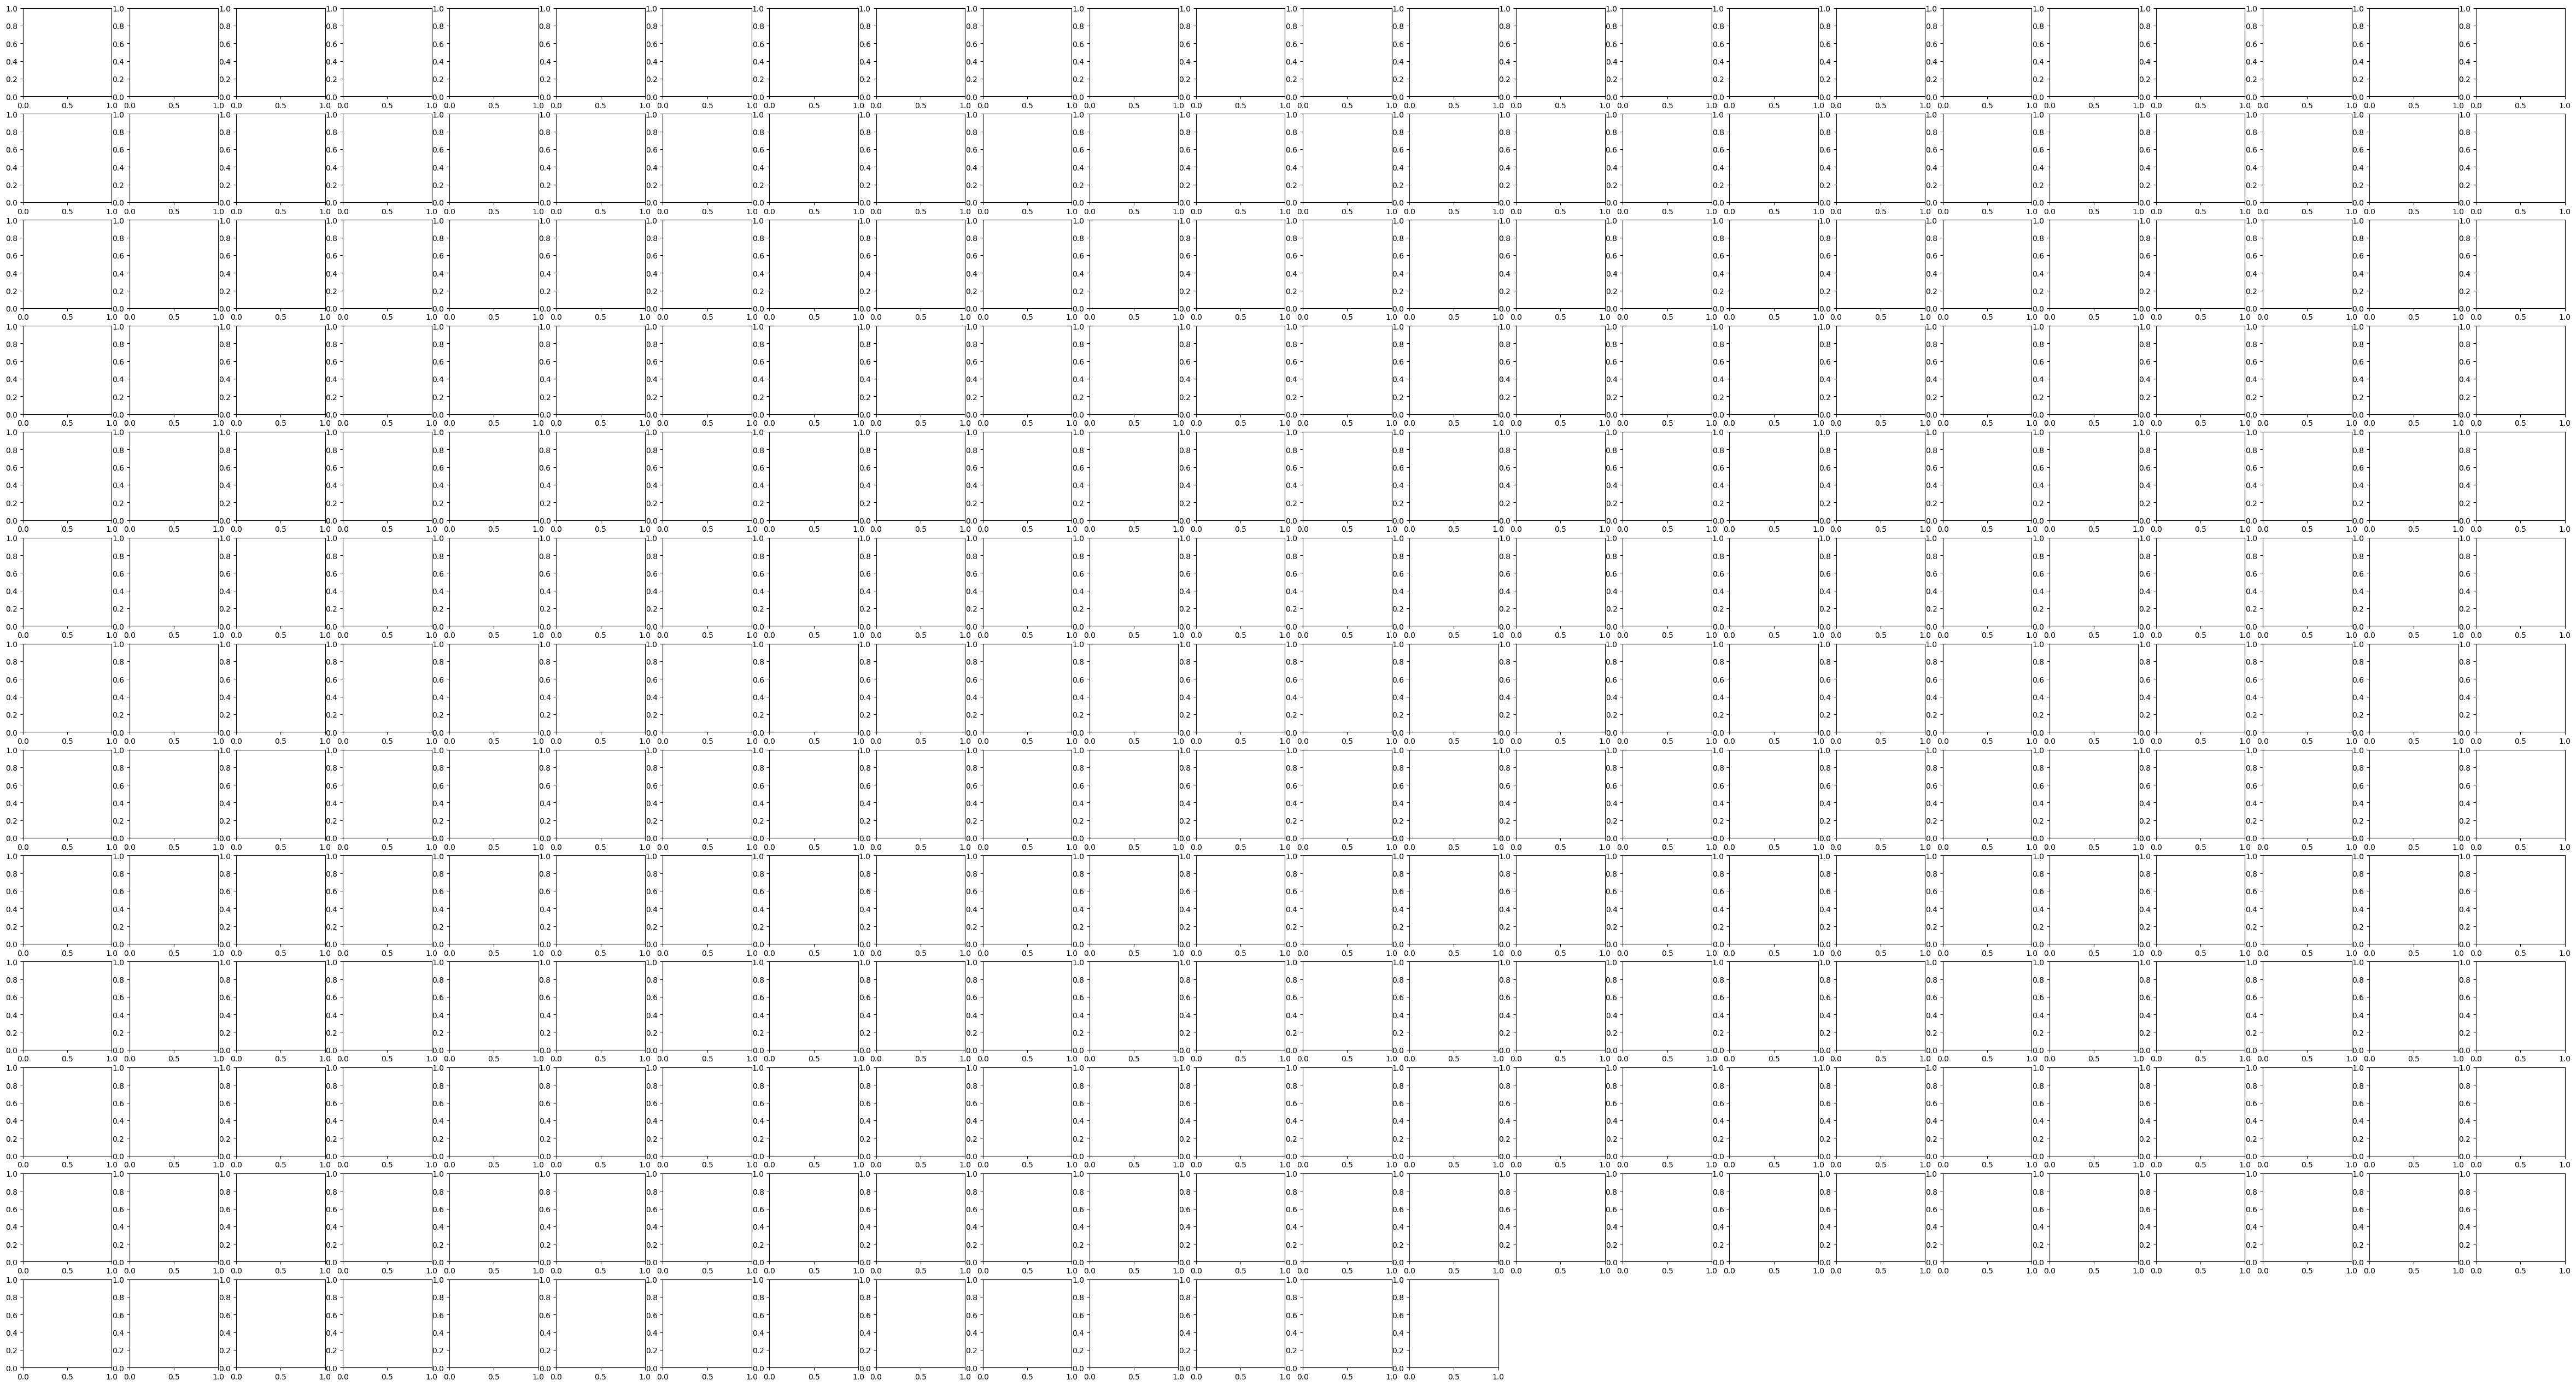

In [41]:
sns.pairplot(sessionDataByDate)

In [49]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,0.000113,0.005818,0.004880,0.001449,-0.004593,0.003911,0.005284,-0.007023,-0.005909,...,-0.015590,0.013663,-0.007182,0.009396,0.016199,0.023970,0.017195,-0.004576,-0.005853,0.007160
user_id,0.000113,1.000000,-0.016413,-0.008156,0.000723,0.014636,-0.003705,0.006242,-0.007738,-0.011196,...,0.003042,0.005419,0.008280,0.004696,-0.015251,-0.005916,0.003968,-0.010389,-0.004802,-0.006163
screen_height,0.005818,-0.016413,1.000000,-0.011459,0.019316,-0.019212,-0.000177,-0.001334,-0.010031,0.003066,...,0.009740,0.021010,-0.021633,-0.003920,0.018663,0.000457,0.020736,-0.011252,-0.002812,-0.001124
pct_scroll_move_duration,0.004880,-0.008156,-0.011459,1.000000,-0.144590,0.073545,0.011335,0.004812,0.004769,0.015707,...,-0.288849,0.009361,-0.066531,0.004324,-0.000901,-0.072363,-0.005410,0.005586,0.008481,-0.012844
scroll_move_total_rel_distance,0.001449,0.000723,0.019316,-0.144590,1.000000,-0.186441,-0.001448,0.004967,0.006977,-0.019226,...,0.276713,0.009498,-0.375749,-0.008159,0.748828,0.377174,0.000706,0.029827,-0.003569,0.002346
pct_click,-0.004593,0.014636,-0.019212,0.073545,-0.186441,1.000000,0.006725,-0.002171,-0.005024,0.004046,...,-0.601846,-0.029119,0.060263,-0.003044,-0.364489,0.018979,-0.010082,-0.016601,0.022735,-0.016892
pct_scrandom,0.003911,-0.003705,-0.000177,0.011335,-0.001448,0.006725,1.000000,0.005358,-0.004800,-0.005092,...,0.012712,-0.001636,0.010849,-0.004290,-0.005034,-0.020927,0.003629,0.002022,-0.005956,0.019770
pct_wild_mouse,0.005284,0.006242,-0.001334,0.004812,0.004967,-0.002171,0.005358,1.000000,-0.004171,-0.016605,...,0.003170,-0.005321,0.001393,-0.032972,0.005876,0.001754,0.001514,0.007328,0.003480,-0.006344
session_id,-0.007023,-0.007738,-0.010031,0.004769,0.006977,-0.005024,-0.004800,-0.004171,1.000000,0.001627,...,-0.000825,0.013123,-0.001313,0.011508,0.003298,0.010454,-0.018674,-0.011251,0.012772,-0.000653
browser_name,-0.005909,-0.011196,0.003066,0.015707,-0.019226,0.004046,-0.005092,-0.016605,0.001627,1.000000,...,-0.011239,-0.027610,0.000360,-0.007978,-0.013610,-0.008955,-0.017698,0.001799,0.008366,-0.000392


---
- We have found strong negative correlation between the duration of rapid mouse movement and user clicks
- The more the user moves the mouse rapidly the less they make clicks

<Axes: xlabel='wild_mouse_duration', ylabel='pct_click'>

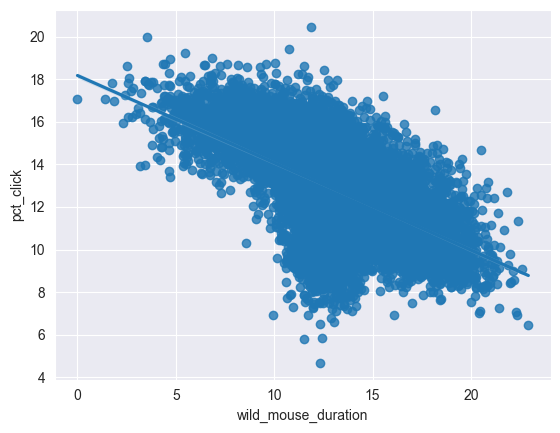

In [50]:
sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_click") #-0.6

---
- We have found moderate positive correlation between the duration of rapid mouse movement and user doubleclicks
- The more the user moves the mouse rapidly the more doubleclicks they make

<Axes: xlabel='pct_doubleclick', ylabel='wild_mouse_duration'>

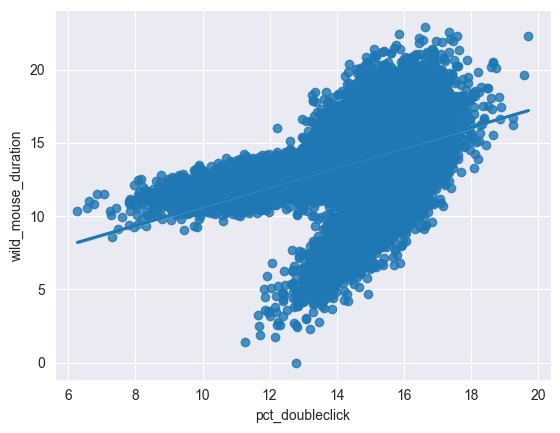

In [51]:
sns.regplot(data=sessionDataByDate.dropna(), x="pct_doubleclick",y="wild_mouse_duration") #0.41

---
- We have found weak negative correlation between the movement of the mouse (relative to the screen's size) and the amount of user clicks 
- The more the user moves the mouse the less clicks they make

<Axes: xlabel='mouse_move_total_rel_distance', ylabel='pct_click'>

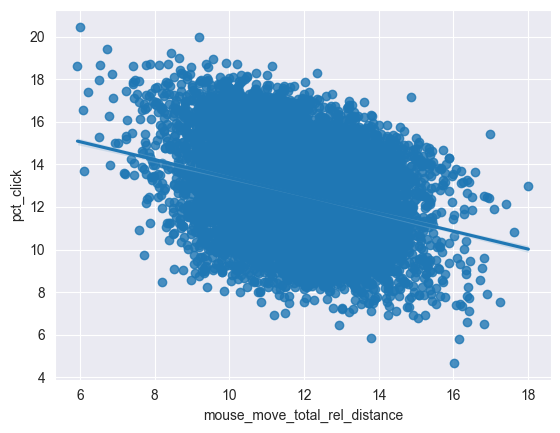

In [52]:
sns.regplot(data=sessionDataByDate.dropna(), x="mouse_move_total_rel_distance",y="pct_click") #-0.29

In [53]:
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="wild_mouse_duration") #-0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="mouse_move_total_rel_distance") #0.22
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_input") #0.28

### Correlation between attributes and the predicted variable (ack)

- We have found strong positive correlation between the scrolling (relative to the screen's size) and purchases made by users 
- The more the user scrolls the more likely they purchase something from the shop

<Axes: xlabel='scroll_move_total_rel_distance', ylabel='ack'>

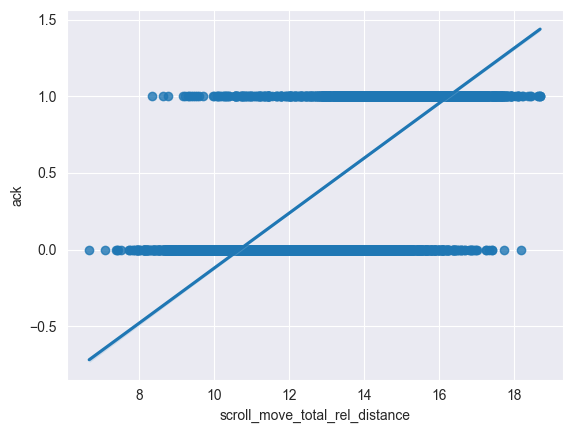

In [54]:
sns.regplot(data=sessionDataByDate.dropna(), x="scroll_move_total_rel_distance",y="ack") #0.74

---
- We have found moderate positive correlation between the time spent on the site and purchases made by users 
- The more time the user spends on the site the more likely they purchase something from the shop

<Axes: xlabel='page_activity_duration', ylabel='ack'>

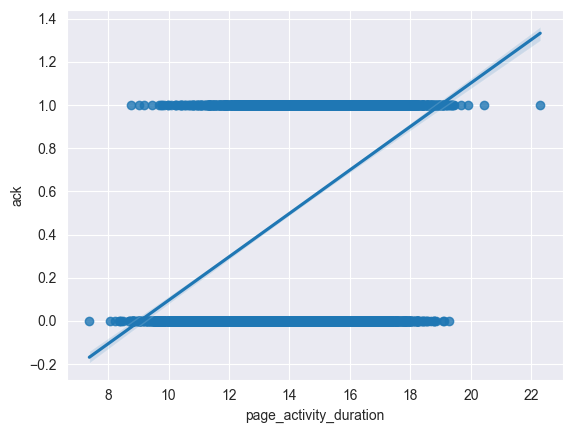

In [55]:
sns.regplot(data=sessionDataByDate.dropna(), x="page_activity_duration",y="ack") #0.39

### Attributes which influence the predicted variable (ack)
- amount of scrolling
- time spent on the site
- clicks made by the user

### Merging datasets
- Because user_id (user ; session) and product_ean (product ; session) are present across datasets we are able to combine them
- Merging these datasets is possible but not neccessary for now

# Hypothesis

### During the session, on average, scroll_move_total_rel_distance has a higher value when a purchase is made (ack=1) than when one isn't made (ack=0)

- We split the data to two groups.
- Group 1: people who purchased (ack=1)
- Group 2: people who did not purchase (ack=0)

In [56]:
purchased = sessionDataByDate.loc[sessionDataByDate.ack == 1, "scroll_move_total_rel_distance"]
not_purchased = sessionDataByDate.loc[sessionDataByDate.ack == 0, "scroll_move_total_rel_distance"]

- Removing outliers

In [57]:
purchased_out = identify_outliers(purchased)
not_purchased_out = identify_outliers(not_purchased)

In [58]:
purchased = purchased.drop(purchased_out.index)
not_purchased = not_purchased.drop(not_purchased_out.index)

- To verify normality, we use the Shapiro-Wilk test, which tests if the data comes from a normal distribution.
- If the p-value < 0.05, we reject the null hypothesis and the data probably come from a non-normal distribution.
- If the p-value > 0.05 then we fail to reject the null hypotesis, thus the data comes from a normal distribution.

In [59]:
np.random.seed(100)
data = np.random.choice(purchased, size=len(not_purchased))

In [60]:
stats.shapiro(data)

ShapiroResult(statistic=0.9983388185501099, pvalue=4.6930304961279035e-05)

In [61]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9959619641304016, pvalue=2.254351705310853e-10)

- Because the data comes from a non-normal distribution we need to use a non-parametric test.
- We will use Mann-Whitney U test
- If the p-value < 0.001 we reject the hypothesis and accept the alternative one.
- If the p-value > 0.001 we accept the null hypothesis.

In [62]:
stats.mannwhitneyu(data, not_purchased)

MannwhitneyuResult(statistic=23123016.5, pvalue=0.0)

### At this significance level, there is not enough evidence to say that people who make purchases scroll more on average
---

### During the session, on average, page_activity_duration has a higher value when a purchase is made (ack=1) than when one isn't made (ack=0)

- We split the data to two groups.
- Group 1: people who purchased (ack=1)
- Group 2: people who did not purchase (ack=0)

In [63]:
purchased = sessionDataByDate.loc[sessionDataByDate.ack == 1, "page_activity_duration"]
not_purchased = sessionDataByDate.loc[sessionDataByDate.ack == 0, "page_activity_duration"]

- Removing outliers

In [64]:
purchased_out = identify_outliers(purchased)

In [65]:
purchased = purchased.drop(purchased_out.index)

- To verify normality, we use the Shapiro-Wilk test, which tests if the data comes from a normal distribution.
- If the p-value < 0.05, we reject the null hypothesis and the data probably come from a non-normal distribution.
- If the p-value > 0.05 then we fail to reject the null hypotesis, thus the data comes from a normal distribution.

In [66]:
np.random.seed(100)
data = np.random.choice(purchased, size=len(not_purchased))

In [67]:
stats.shapiro(data)

ShapiroResult(statistic=0.998307466506958, pvalue=3.512743933242746e-05)

In [68]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9815049171447754, pvalue=6.031935178844498e-25)

- Because the data comes from a non-normal distribution we need to use a non-parametric test.
- We will use Mann-Whitney U test
- If the p-value < 0.001 we reject the hypothesis and accept the alternative one.
- If the p-value > 0.001 we accept the null hypothesis.

In [69]:
stats.mannwhitneyu(data,not_purchased)

MannwhitneyuResult(statistic=17549544.0, pvalue=5.5293485211522595e-298)

### At this significance level, there is not enough evidence to say that people who make purchases spend more time on the page on average

# Phase 2

### Percentage of work: 50%/50%

In [70]:
from sklearn.impute import SimpleImputer
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split

## Data Cleaning

### Removing and replacing missing values (NaNs)

- After checking the data we see that we don't have any missing values in the session data, because we dropped them in the last phase

In [71]:
sessionDataByDate.isna().sum()

pct_click_product_info            0
user_id                           0
screen_height                     0
pct_scroll_move_duration          0
scroll_move_total_rel_distance    0
pct_click                         0
pct_scrandom                      0
pct_wild_mouse                    0
session_id                        0
browser_name                      0
pct_input                         0
screen_width                      0
mouse_move_total_rel_distance     0
pct_mouse_click                   0
wild_mouse_duration               0
pct_mouse_move                    0
pct_doubleclick                   0
pct_rage_click                    0
ack                               0
page_activity_duration            0
total_load_time                   0
pct_scroll_move                   0
product_ean                       0
session_duration                  0
dtype: int64

- and product data

In [72]:
productData.isna().sum()

location       0
product_ean    0
code           0
store_name     0
dtype: int64

- However in the user data we have a lot of missing values so we will replace them

In [73]:
userData.isna().sum()

sex                 1262
residence           1641
username               0
user_id                0
address              379
current_location     126
race                   0
name                   0
birthdate           1136
mail                   0
dtype: int64

In [74]:
userData.head()

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,F,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",unspecified,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,F,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",unspecified,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,F,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",unspecified,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,M,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",unspecified,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,F,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",unspecified,前田 真綾,NaN,sayuri12@hotmail.com


- We replace the values in the sex column with 1s and 0s (1 = Male; 0 = Female) randomly, while taking into consideration their frequency

In [75]:
a = userData
s = a.sex.value_counts(normalize=True)
a['sex_fillna'] = a['sex']
a.loc[a.sex.isna(), 'sex_fillna'] = np.random.choice(s.index, p=s.values, size=a.sex.isna().sum())
a.sex = a.sex_fillna

In [76]:
le = LabelEncoder()
userData.sex = le.fit_transform(userData.sex)
new = userData
userData = userData.drop('sex_fillna', axis=1)

In [77]:
userData.head()

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,0,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",unspecified,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,0,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",unspecified,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,0,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",unspecified,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,1,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",unspecified,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,0,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",unspecified,前田 真綾,NaN,sayuri12@hotmail.com


In [78]:
userData.isna().sum()

sex                    0
residence           1641
username               0
user_id                0
address              379
current_location     126
race                   0
name                   0
birthdate           1136
mail                   0
dtype: int64

In [79]:
userData = userData.dropna(subset=['address', 'current_location'])

- Removing residence column beacause it has lot of NaNs na it is not important

In [80]:
userData = userData.drop('residence', axis=1)

- We convert the birthdates to datetime category

In [81]:
userData["birthdate"] = pd.to_datetime(userData["birthdate"], errors="coerce")

- Calculate a mean from the birthdates and replace missing values with the mean

In [82]:
mean_birthdate = userData["birthdate"].mean()
mean_birthdate

Timestamp('1964-11-30 01:51:55.807860256')

In [83]:
userData.fillna(mean_birthdate, inplace=True)

- Remove the time part of the datetime. The exact time of birth is not important

In [84]:
userData["birthdate"] = pd.to_datetime(userData["birthdate"], errors="coerce").dt.date

- No missing values remaining

In [85]:
userData.isna().sum()

sex                 0
username            0
user_id             0
address             0
current_location    0
race                0
name                0
birthdate           0
mail                0
dtype: int64

### Removing and replacing outliers

In [86]:
def remove_outliers(a):
    outliers = identify_outliers(a)
    a = a.drop(outliers.index)
    return a
def replace_outliers(a):
    a = a.clip(lower=a.quantile(0.05), upper=a.quantile(0.95))
    return a
    

In [87]:
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        print(f"{column}: {len(series)}")

pct_click_product_info: 72
user_id: 0
screen_height: 0
pct_scroll_move_duration: 224
scroll_move_total_rel_distance: 2
pct_click: 25
pct_scrandom: 83
pct_wild_mouse: 70
session_id: 0
browser_name: 0
pct_input: 1751
screen_width: 0
mouse_move_total_rel_distance: 145
pct_mouse_click: 73
wild_mouse_duration: 173
pct_mouse_move: 69
pct_doubleclick: 238
pct_rage_click: 74
page_activity_duration: 48
total_load_time: 340
pct_scroll_move: 72
product_ean: 0
session_duration: 77


In [88]:
to_remove = []
to_replace = []
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        if len(series) < 100 and len(series) > 0:
            to_remove.append(column)
        else:
            to_replace.append(column)

In [89]:
for column in to_remove:
    sessionDataByDate[column] = sessionDataByDate[column].drop_duplicates()
    sessionDataByDate[column] = remove_outliers(sessionDataByDate[column])

In [90]:
for column in to_replace:
    sessionDataByDate[column] = replace_outliers(sessionDataByDate[column])

In [91]:
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        print(f"{column}: {len(series)}")

pct_click_product_info: 0
user_id: 0
screen_height: 0
pct_scroll_move_duration: 0
scroll_move_total_rel_distance: 0
pct_click: 0
pct_scrandom: 0
pct_wild_mouse: 0
session_id: 0
browser_name: 0
pct_input: 1751
screen_width: 0
mouse_move_total_rel_distance: 0
pct_mouse_click: 0
wild_mouse_duration: 0
pct_mouse_move: 0
pct_doubleclick: 0
pct_rage_click: 0
page_activity_duration: 0
total_load_time: 0
pct_scroll_move: 0
product_ean: 0
session_duration: 0


## Data Pre-processing

### Splitting the dataset to training part

In [92]:
#dataset = sessionDataByDate.loc[:, sessionDataByDate.columns!='ack']
#y = sessionDataByDate.loc[:, sessionDataByDate.columns=='ack']

training, test = train_test_split(sessionDataByDate,train_size=0.7, test_size=0.3,  random_state=42)

In [93]:
training = training.dropna()

### Creating Pipeline

- Pre-processing is repeatable for the test set because of the pipeline

- We used the power tranformer to get a more gaussian-like distribution of the data
- We used MinMaxScaler and Normalizer to get a more dense data and normalize them between 0 and 1
- This can improve the performance of the model and reduces the impact of outliers

In [94]:
pipeline = make_pipeline(PowerTransformer(), Normalizer(), MinMaxScaler())
aX = training.loc[:,training.columns!="ack"]
ay = training.loc[:,training.columns=="ack"]
pipeline.fit(aX)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('normalizer', Normalizer()),
                ('minmaxscaler', MinMaxScaler())])

In [95]:
test = test.dropna()

## EDA again

In [96]:
df = pd.DataFrame(pipeline.transform(aX),columns = aX.columns)

In [97]:
df = df.drop_duplicates()

In [98]:
df.head()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
0,0.483297,0.830955,0.215445,0.399199,0.302422,0.739900,0.682290,0.597203,0.586262,0.206315,...,0.288632,0.380864,0.653925,0.636035,0.634847,0.357758,0.353907,0.721694,0.421046,0.305786
1,0.553241,0.831776,0.749123,0.309755,0.683344,0.471622,0.201844,0.552290,0.430176,0.577151,...,0.415754,0.425085,0.798561,0.169126,0.862808,0.397291,0.659488,0.398391,0.535458,0.427773
2,0.526519,0.416254,0.396685,0.581858,0.648739,0.559446,0.125098,0.219608,0.631163,0.761154,...,0.804936,0.540743,0.478969,0.544569,0.422644,0.606602,0.336440,0.504649,0.923740,0.552812
3,0.214946,0.149430,0.151074,0.318167,0.254261,0.685163,0.621768,0.431970,0.261689,0.581869,...,0.552599,0.302413,0.545666,0.754692,0.517217,0.562376,0.601750,0.398216,0.220685,0.471410
4,0.296831,0.508389,0.200177,0.377933,0.424204,0.884228,0.418473,0.561998,0.638615,0.805803,...,0.421551,0.144439,0.455942,0.449036,0.430851,0.508094,0.146411,0.345630,0.705511,0.295969


In [99]:
for column in df.columns:
    print(len(identify_outliers(df[column])))

15
0
0
1
0
4
21
27
0
0
0
0
0
15
0
16
0
18
3
0
20
0
22


In [100]:
df.describe()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,...,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,0.499104,0.564641,0.531923,0.465704,0.496981,0.547606,0.523262,0.481995,0.546237,0.553146,...,0.524475,0.530765,0.504503,0.516771,0.527826,0.445235,0.494476,0.468109,0.533240,0.501134
std,0.143866,0.203240,0.246922,0.187074,0.184168,0.155160,0.154921,0.152132,0.201901,0.196182,...,0.155131,0.221959,0.150591,0.208827,0.158439,0.168339,0.197856,0.152859,0.200058,0.161141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398668,0.402625,0.398171,0.328131,0.332927,0.433681,0.414083,0.378218,0.380698,0.416683,...,0.417183,0.378386,0.397438,0.359262,0.414970,0.324907,0.341803,0.360870,0.366727,0.388460
50%,0.499683,0.581725,0.473383,0.465779,0.525447,0.539722,0.522697,0.483286,0.564457,0.577335,...,0.524389,0.509742,0.505371,0.539833,0.528160,0.457628,0.494797,0.467637,0.551041,0.500487
75%,0.600564,0.743604,0.786311,0.596847,0.646473,0.662467,0.627901,0.587489,0.720627,0.699852,...,0.633373,0.720555,0.609583,0.674824,0.638751,0.563998,0.648585,0.574824,0.708261,0.613365
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,-0.000004,0.005697,0.006119,0.001335,-0.004970,0.003994,0.005340,-0.006863,-0.004825,...,-0.014009,0.013583,-0.008144,0.009609,0.016309,0.024397,0.022520,-0.004960,-0.005882,0.006896
user_id,-0.000004,1.000000,-0.016362,-0.011872,0.001118,0.015429,-0.004622,0.005454,-0.007592,-0.009701,...,0.000635,0.005217,0.006893,0.005053,-0.014723,-0.004432,0.004794,-0.011439,-0.004673,-0.005971
screen_height,0.005697,-0.016362,1.000000,-0.010626,0.019990,-0.018299,0.000006,-0.001194,-0.010685,0.004266,...,0.006723,0.020475,-0.023430,-0.003871,0.018663,0.000528,0.018828,-0.011665,-0.003048,-0.001105
pct_scroll_move_duration,0.006119,-0.011872,-0.010626,1.000000,-0.142785,0.074333,0.010436,0.005278,0.007576,0.014193,...,-0.276657,0.009419,-0.059913,0.003578,-0.003922,-0.069392,-0.009116,0.006609,0.007833,-0.013542
scroll_move_total_rel_distance,0.001335,0.001118,0.019990,-0.142785,1.000000,-0.185371,-0.001919,0.004777,0.006920,-0.017332,...,0.248049,0.009156,-0.387180,-0.008241,0.748635,0.378448,0.000694,0.029278,-0.003787,0.002673
pct_click,-0.004970,0.015429,-0.018299,0.074333,-0.185371,1.000000,0.006050,-0.002474,-0.004716,0.003975,...,-0.593072,-0.028210,0.052624,-0.002859,-0.364787,0.019419,-0.011951,-0.015979,0.023021,-0.016371
pct_scrandom,0.003994,-0.004622,0.000006,0.010436,-0.001919,0.006050,1.000000,0.005573,-0.005449,-0.005224,...,0.015556,-0.001096,0.010148,-0.004905,-0.004554,-0.021494,0.007146,0.001538,-0.006426,0.020104
pct_wild_mouse,0.005340,0.005454,-0.001194,0.005278,0.004777,-0.002474,0.005573,1.000000,-0.004386,-0.016276,...,0.002664,-0.006513,0.000131,-0.033227,0.006236,0.000440,0.002024,0.007192,0.003741,-0.006372
session_id,-0.006863,-0.007592,-0.010685,0.007576,0.006920,-0.004716,-0.005449,-0.004386,1.000000,0.000759,...,-0.001290,0.013031,-0.000954,0.011929,0.003585,0.011341,-0.016369,-0.011186,0.013008,-0.000673
browser_name,-0.004825,-0.009701,0.004266,0.014193,-0.017332,0.003975,-0.005224,-0.016276,0.000759,1.000000,...,-0.012754,-0.026761,0.001862,-0.008633,-0.013065,-0.007907,-0.018704,0.003416,0.011185,0.000370


In [102]:
sns.regplot(data=df, x="scroll_move_total_rel_distance",y="ack")

KeyError: 'ack'

In [103]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression

def findInDF(col, df):
    for i,c in zip(df.T.values,df.columns):
        if i[0] == col[0]:
            return c 

- We chose f_regression because it helps assess the statistical significance of the relationship between each individual feature and the target variable.
- We chose mutual_info_regression because it is capable of capturing non-linear relationships between features and the target variable.

In [104]:
#X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(mutual_info_regression, k=4).fit_transform(aX, ay)

for i in features.T:
    print(findInDF(i,df))
    print(i)

C:\Users\Akos Levardy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


None
[11.53332 15.8558  15.06062 ... 14.06385 13.73352 14.18347]
None
[0.00143 0.00254 0.01066 ... 0.01498 0.11869 0.00438]
None
[15.46915   10.4804105 14.74303   ... 15.809     16.50893   10.4804105]
None
[13.5562  14.04778 15.83249 ... 16.34738 14.85419 14.8863 ]


 - f_reg for 1 feature

In [105]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=1).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


 - f_reg for 2 features

In [106]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=2).fit_transform(X, y)
for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


 - f_reg for 3 features

In [107]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=3).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


 - f_reg for 4 features

In [108]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=4).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


# Using Pipeline on testing data

In [109]:
bX = test.loc[:,test.columns!="ack"]
by = test.loc[:,test.columns=="ack"]
pipeline.transform(bX)

array([[0.16190518, 0.51711424, 0.7356981 , ..., 0.6550118 , 0.6421021 ,
        0.52644517],
       [0.53783781, 0.59886834, 0.15921856, ..., 0.50590312, 0.13527874,
        0.57381487],
       [0.6829549 , 0.33756545, 0.47803675, ..., 0.21120432, 0.74002084,
        0.38970775],
       ...,
       [0.82497267, 0.78802918, 0.44823452, ..., 0.3986169 , 0.42561619,
        0.48878856],
       [0.3487445 , 0.46412092, 0.47339525, ..., 0.34355921, 0.23024035,
        0.63910795],
       [0.45716629, 0.86569789, 0.18416629, ..., 0.38555671, 0.3006628 ,
        0.22479163]])

# Phase 3

### Percentage of work: 50%/50%

In [175]:
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.exceptions import DataConversionWarning
from sklearn.pipeline import Pipeline

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


## A simple classifier based on dependence in data
### Implementation of OneR

- We created the OneR algorithm to find the column with the best metric values.

In [111]:
def oneR(data, y):
    best_feature = None
    best = 0
    feature_accuracy = 0
    feature_precision = 0
    feature_recall = 0
    
    data["ack"] = y.values
    columns = [column for column in data.columns if column != "ack"]

    for feature in columns:
        g1 = data[feature][data["ack"] == 0]
        g2 = data[feature][data["ack"] == 1]
        m = (g1.mean()+g2.mean())//2
        split = data[data[feature] > m].groupby("ack").size()

        left, right = (1,0) if split.iloc[0] > split.iloc[1] else (0,1)

        #print(left, right, m)

        data.loc[data[feature] < m, "pred"] = left
        data.loc[data[feature] > m, "pred"] = right

        accuracy = accuracy_score(data["ack"], data["pred"])
        precision = precision_score(data["ack"], data["pred"])
        recall = recall_score(data["ack"], data["pred"])
        
        if (accuracy+precision+recall)/3 > best:
            best_feature = feature
            best = (accuracy+precision+recall)/3
            feature_accuracy = accuracy
            feature_precision = precision
            feature_recall = recall
    
    print(f"Best feature: {best_feature}")
    print(f"Accuracy: {feature_accuracy}")
    print(f"Precision: {feature_precision}")
    print(f"Recall: {feature_recall}")
    


- After using the OneR algorithm we see the best feature for us is the scroll_move_total_rel_distance
- Metrics:
    - accuracy: (TP + TN) / total population
    - precision: TP / (FP + TP)
    - recall: TP / (FN + TP

In [112]:
oneR_result = oneR(aX.copy(), ay.copy())
oneR_result

Best feature: scroll_move_total_rel_distance
Accuracy: 0.8582850840915357
Precision: 0.8090580480544334
Recall: 0.9669631512071156


## Training and evaluation of machine learning classifiers

### Random forest (tree algorithm)

- Training Random forest with training data (aX=training features, ay=training labels)

In [113]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(aX, ay.values)

RandomForestClassifier(random_state=42)

- Testing on testing data (bX=testing features)

In [114]:
forest_pred = forest_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [115]:
print(f"Random Forest Accuracy: {accuracy_score(by, forest_pred)}")
print(f"Random Forest Precision: {precision_score(by, forest_pred)}")
print(f"Random Forest Recall: {recall_score(by, forest_pred)}")

Random Forest Accuracy: 0.949240219851277
Random Forest Precision: 0.9546792230723955
Random Forest Recall: 0.9529964747356052


### After evaluation, we see that the Random forest had a better Accuracy score than the OneR algorithm

In [116]:
print(classification_report(by,forest_pred))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1391
        True       0.95      0.95      0.95      1702

    accuracy                           0.95      3093
   macro avg       0.95      0.95      0.95      3093
weighted avg       0.95      0.95      0.95      3093



### Confusion Matrix

Text(0.5, 23.52222222222222, 'true')

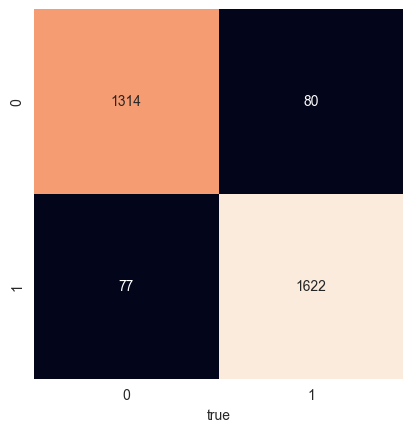

In [122]:
mat = confusion_matrix(by, forest_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true")

### Decision tree

- Training Decision tree with training data (aX=training features, ay=training labels)

In [123]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(aX, ay)

DecisionTreeClassifier(random_state=42)

- Testing on testing data (bX=testing features)

In [124]:
tree_pred = tree_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [125]:
print(f"Decision Tree Accuracy: {accuracy_score(by, tree_pred)}")
print(f"Decision Tree Precision: {precision_score(by, tree_pred)}")
print(f"Decision Tree Recall: {recall_score(by, tree_pred)}")

Decision Tree Accuracy: 0.8920142256708697
Decision Tree Precision: 0.9120481927710843
Decision Tree Recall: 0.8895417156286721


In [126]:
print(classification_report(by,tree_pred))

              precision    recall  f1-score   support

       False       0.87      0.90      0.88      1391
        True       0.91      0.89      0.90      1702

    accuracy                           0.89      3093
   macro avg       0.89      0.89      0.89      3093
weighted avg       0.89      0.89      0.89      3093



### Confusion Matrix

Text(0.5, 23.52222222222222, 'true')

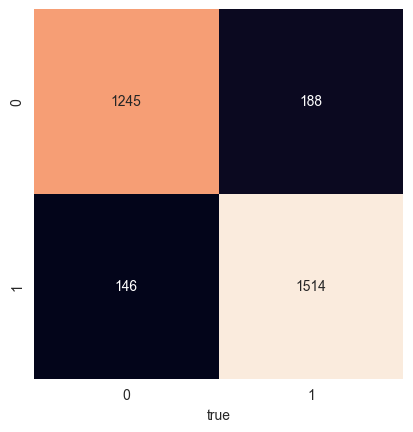

In [127]:
mat = confusion_matrix(by, tree_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true")

### Plot Tree - Visualisation

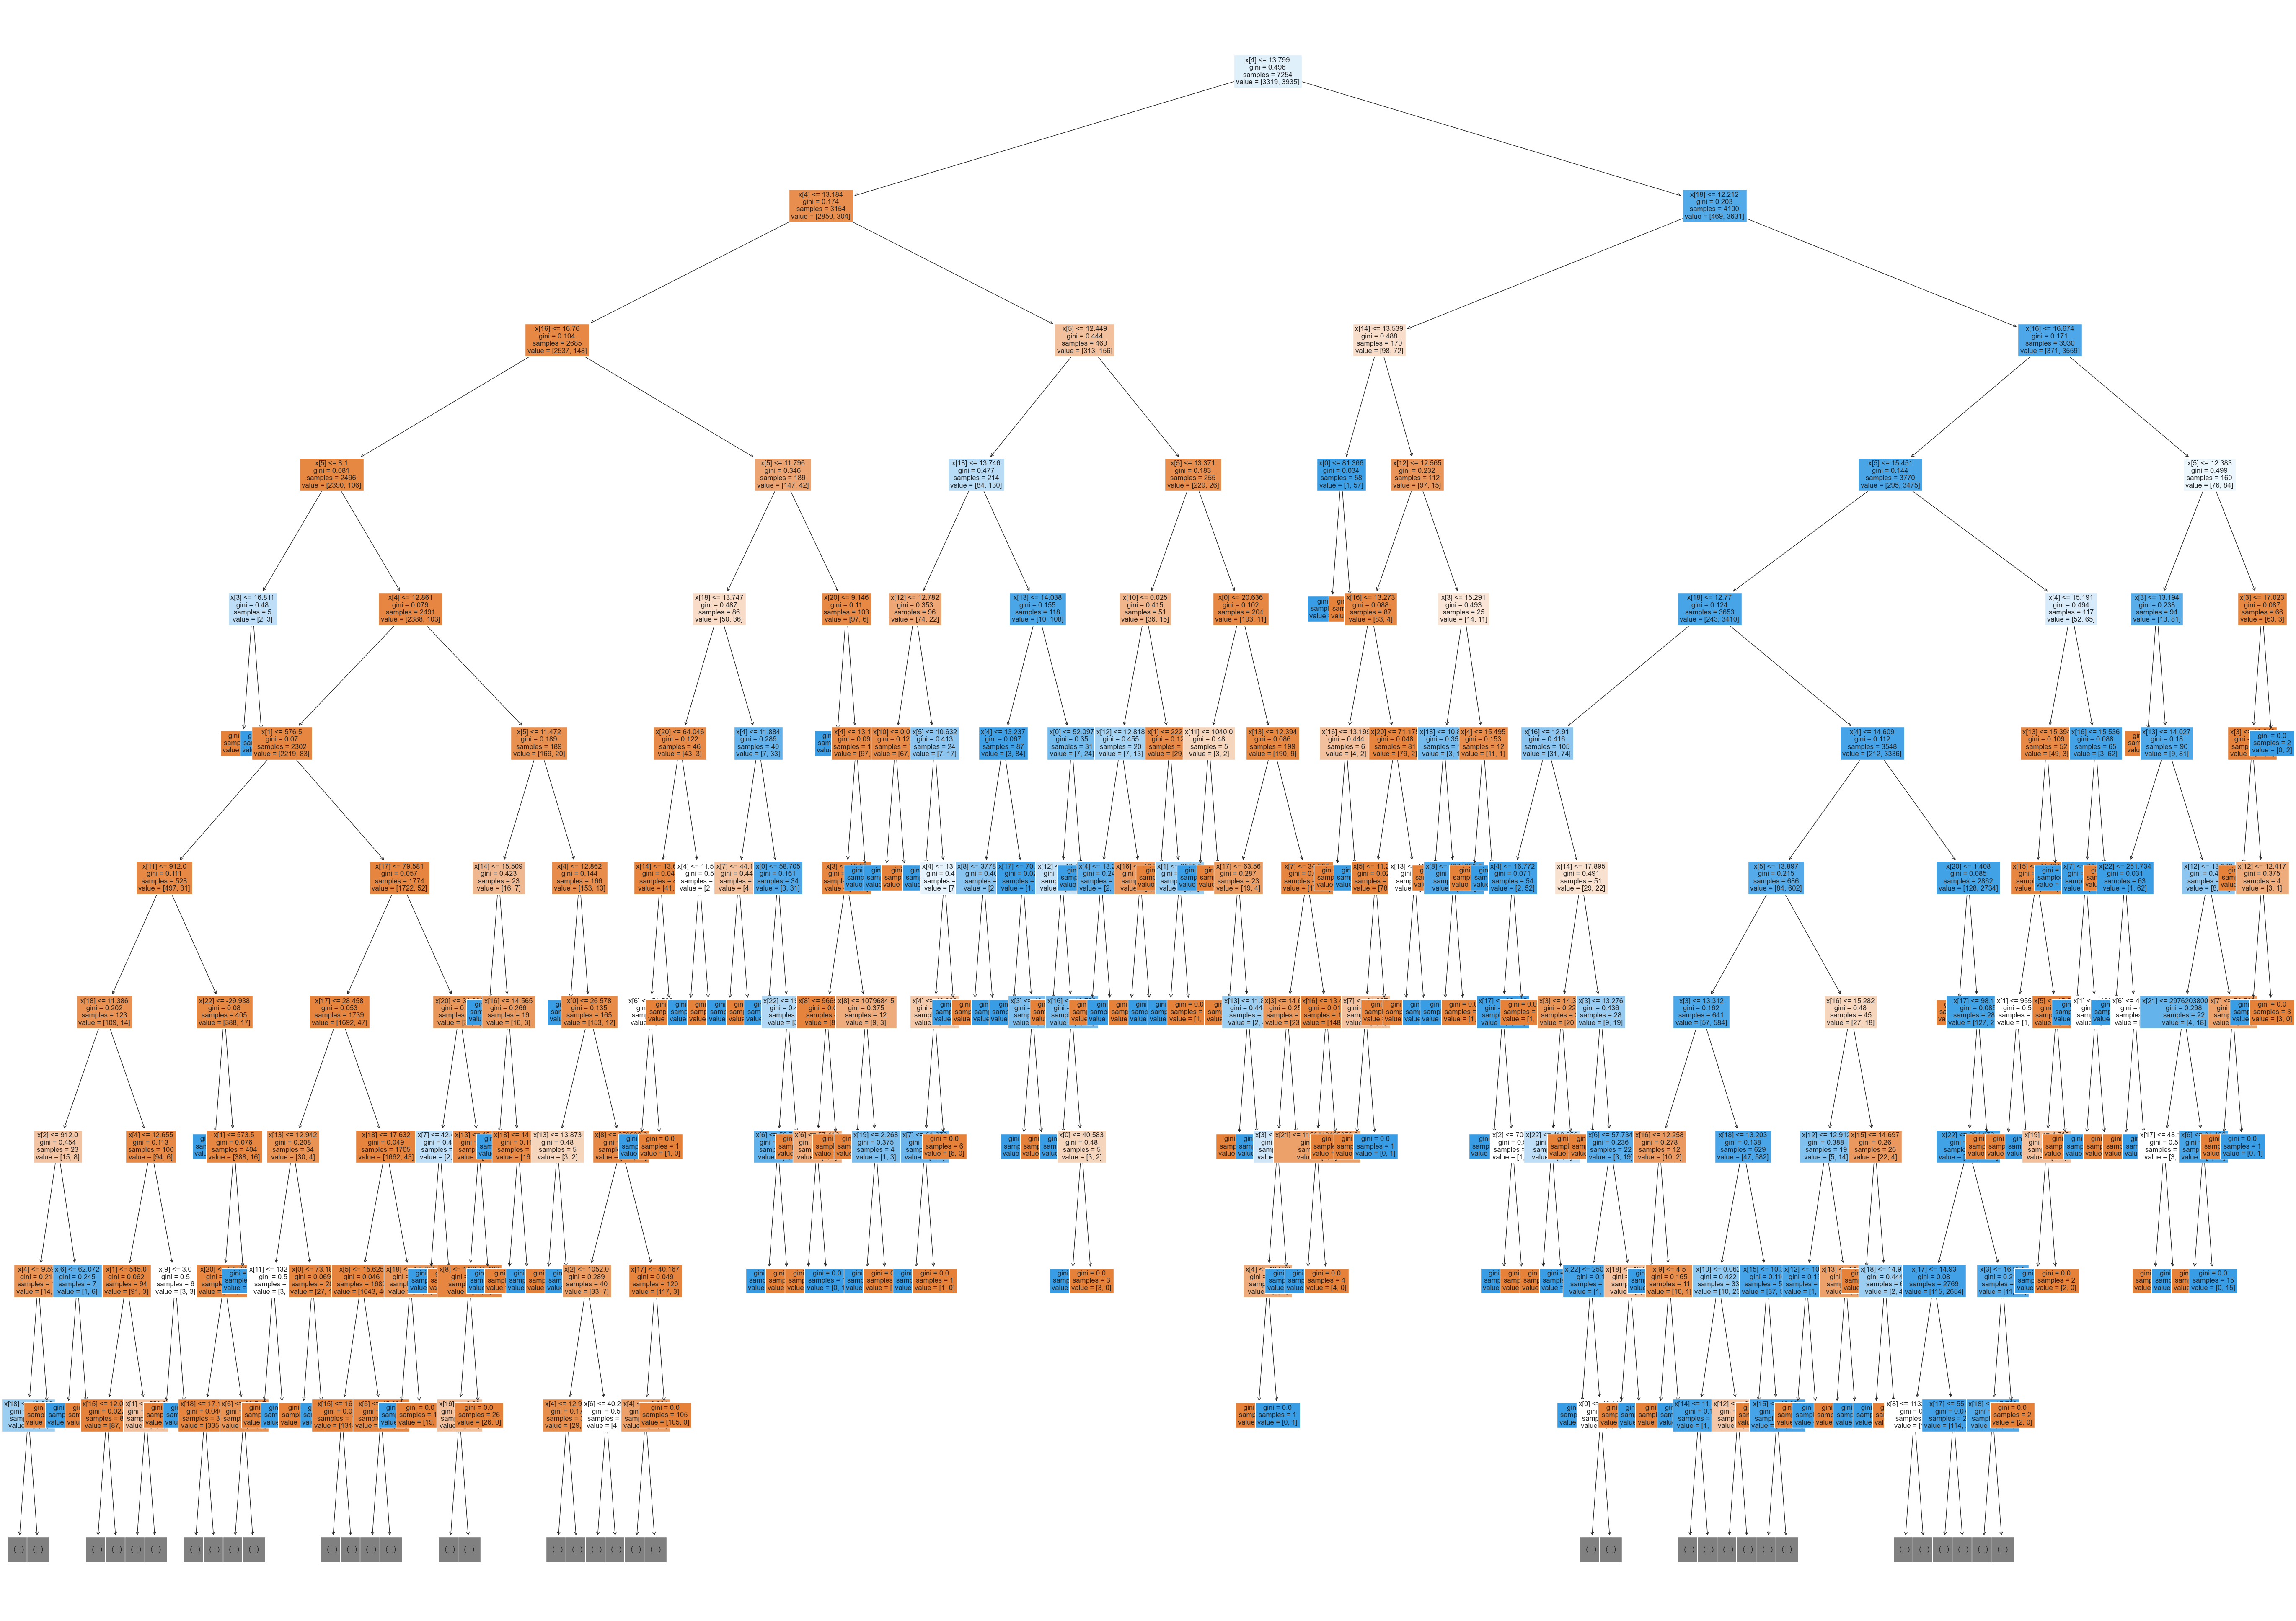

In [128]:
plt.figure(figsize=(70,50))
plot_tree(tree_clf, filled=True, fontsize=12, max_depth=10)
plt.show()

### KNN (comparing with 1 different algorithm)

- Training KNN with training data (aX=training features, ay=training labels)

In [129]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(aX, ay.values)

KNeighborsClassifier()

- Testing on testing data (bX=testing features)

In [130]:
knn_pred = knn_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [131]:
print(f"KNN Accuracy: {accuracy_score(by, knn_pred)}")
print(f"KNN Precision: {precision_score(by, knn_pred)}")
print(f"KNN Recall: {recall_score(by, knn_pred)}")

KNN Accuracy: 0.5079211121888134
KNN Precision: 0.5499445061043285
KNN Recall: 0.582256169212691


In [132]:
kNNscores = cross_val_score(knn_clf, aX, ay, cv=5)
RFCscores = cross_val_score(forest_clf,aX,ay,cv=5)
print(kNNscores)
print(RFCscores)

[0.49345279 0.52101999 0.49138525 0.48725017 0.49724138]
[0.93935217 0.94831151 0.94279807 0.94624397 0.95724138]


In [133]:
print(f"Random Forest Classifier Accuracy: {RFCscores.mean()}")
print(f"K-Nearest Neighbors Classifier Accuracy: {kNNscores.mean()}")

Random Forest Classifier Accuracy: 0.9467894199006631
K-Nearest Neighbors Classifier Accuracy: 0.4980699161101737


- After performing cross validation on both classifiers we averarge their accuracy scores.
- From this we can determine that using RFC is going to be better for us because it performs better and has better accuracy

### Hyperparameter tuning

- We tried to find the best hyperparameters to improve the success value in a given classifier
- Hyperparameters are parameters in the random forest classifier that we can experiment with, but we will only run a few tests to demonstrate the solution
- By changing the parameters to the right combination, the success of the given classifier will improve

In [134]:
max_depth = list()
for tree in forest_clf.estimators_:
    max_depth.append(tree.tree_.max_depth)
print("The maximum depth of the trees in the Random Forest Classifier is: ", max(max_depth))

The maximum depth of the trees in the Random Forest Classifier is:  34


In [135]:
print(f"Number of estimators in the Random Forest Classifier is: {len(forest_clf.estimators_)}")

Number of estimators in the Random Forest Classifier is: 100


### Parameters: first try

In [136]:
p = {"criterion": ("gini", "entropy"), "max_features": ["sqrt", "log2"], "max_depth": [7,8,9,10]}
optimisation = GridSearchCV(forest_clf, p, cv=5, scoring="accuracy")
result = optimisation.fit(aX,ay.values)

In [137]:
score = pd.DataFrame(optimisation.cv_results_)
score.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.758876,0.229870,0.014542,0.001206,gini,7,sqrt,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.934528,0.940041,0.933150,0.935906,0.946207,0.937966,0.004722,13
1,1.750037,0.206054,0.014247,0.000194,gini,7,log2,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.934528,0.940041,0.933150,0.935906,0.946207,0.937966,0.004722,13
2,1.847748,0.016712,0.015322,0.000941,gini,8,sqrt,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.931771,0.942109,0.936595,0.937285,0.951034,0.939759,0.006521,11
3,1.876249,0.038941,0.014722,0.000639,gini,8,log2,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.931771,0.942109,0.936595,0.937285,0.951034,0.939759,0.006521,11
4,2.061851,0.030620,0.015501,0.000611,gini,9,sqrt,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.931771,0.945555,0.940041,0.940041,0.953103,0.942102,0.007045,7
5,2.123065,0.090453,0.015327,0.000472,gini,9,log2,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.931771,0.945555,0.940041,0.940041,0.953103,0.942102,0.007045,7
6,2.276439,0.104648,0.017361,0.001607,gini,10,sqrt,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.933839,0.943487,0.942109,0.939352,0.955172,0.942792,0.007017,3
7,2.268587,0.040941,0.016672,0.000427,gini,10,log2,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.933839,0.943487,0.942109,0.939352,0.955172,0.942792,0.007017,3
8,2.067855,0.071603,0.014238,0.000217,entropy,7,sqrt,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.930393,0.937285,0.935217,0.936595,0.947586,0.937415,0.005626,15
9,2.091965,0.105610,0.014389,0.000540,entropy,7,log2,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.930393,0.937285,0.935217,0.936595,0.947586,0.937415,0.005626,15


- The best combination of hyperparameters in the field of estimation

In [138]:
optimisation.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [139]:
best_est = optimisation.best_estimator_
best_est = best_est.fit(aX, ay.values)
predicted = best_est.predict(bX)

In [140]:
print(f"Accuracy: {accuracy_score(by, predicted)}")
print(f"Precision: {precision_score(by, predicted)}")
print(f"Recall: {recall_score(by, predicted)}")

Accuracy: 0.9463304235370191
Precision: 0.949648711943794
Recall: 0.9529964747356052


In [141]:
print(classification_report(by,predicted))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1391
        True       0.95      0.95      0.95      1702

    accuracy                           0.95      3093
   macro avg       0.95      0.95      0.95      3093
weighted avg       0.95      0.95      0.95      3093



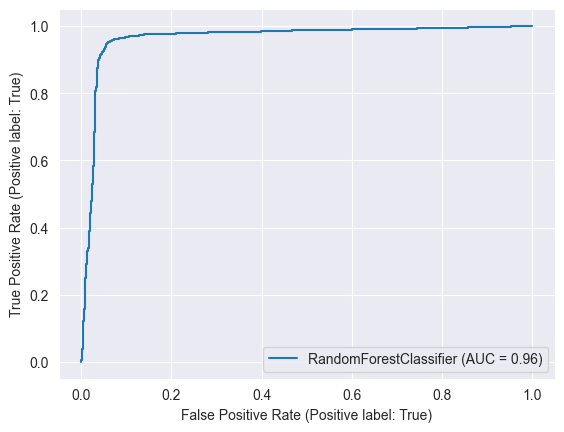

In [156]:
rfc = RocCurveDisplay.from_estimator(best_est, bX, by)
plt.show()

### Cross validation on training data

In [144]:
scores = cross_val_score(best_est, aX, ay, cv=5)
scores

array([0.93452791, 0.94624397, 0.94004135, 0.94210889, 0.95655172])

In [145]:
print(scores.mean())
print(scores.var(ddof=1))

0.9438947693623898
6.787336636232416e-05


### Parameters: second try

In [146]:
p1 = {"criterion": ["gini"],"n_estimators": [50,75,100] ,"max_features": ["sqrt", "log2"], "max_depth": [10,20,28]}
optimisation1 = GridSearchCV(forest_clf, p1, cv=5, scoring="roc_auc")
result1 = optimisation1.fit(aX,ay.values)

In [147]:
score1 = pd.DataFrame(optimisation1.cv_results_)
score1.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.481149,0.218419,0.012169,0.000933,gini,10,sqrt,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955506,0.962973,0.960708,0.953430,0.966816,0.959887,0.004880,17
1,2.145745,0.295591,0.015413,0.001091,gini,10,sqrt,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.957167,0.962640,0.959527,0.953145,0.967044,0.959905,0.004728,15
2,2.481848,0.051094,0.020542,0.002095,gini,10,sqrt,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.957261,0.963010,0.960225,0.953926,0.966415,0.960167,0.004348,13
3,1.325467,0.077373,0.013084,0.001242,gini,10,log2,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955506,0.962973,0.960708,0.953430,0.966816,0.959887,0.004880,17
4,1.828472,0.046930,0.015254,0.000582,gini,10,log2,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.957167,0.962640,0.959527,0.953145,0.967044,0.959905,0.004728,15
5,2.501006,0.154271,0.021272,0.003577,gini,10,log2,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.957261,0.963010,0.960225,0.953926,0.966415,0.960167,0.004348,13
6,1.551751,0.055198,0.013732,0.002352,gini,20,sqrt,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.952913,0.962253,0.964140,0.954808,0.968438,0.960510,0.005819,11
7,2.278302,0.045470,0.017639,0.000603,gini,20,sqrt,75,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.953007,0.963620,0.964199,0.955154,0.969777,0.961151,0.006198,5
8,3.024029,0.058777,0.021816,0.000861,gini,20,sqrt,100,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.953197,0.962862,0.962875,0.955780,0.970004,0.960943,0.005936,9
9,1.496288,0.021740,0.012345,0.000845,gini,20,log2,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.952913,0.962253,0.964140,0.954808,0.968438,0.960510,0.005819,11


In [148]:
optimisation1.best_estimator_

RandomForestClassifier(max_depth=28, n_estimators=75, random_state=42)

In [149]:
best_est1 = optimisation1.best_estimator_
best_est1 = best_est1.fit(aX, ay.values)
predicted1 = best_est1.predict(bX)

In [150]:
print(f"Accuracy: {accuracy_score(by, predicted1)}")
print(f"Precision: {precision_score(by, predicted1)}")
print(f"Recall: {recall_score(by, predicted1)}")

Accuracy: 0.9485935984481086
Precision: 0.9535567313345091
Recall: 0.9529964747356052


### Cross validation on training data

In [151]:
scores1 = cross_val_score(best_est1, aX, ay, cv=5)
scores1

array([0.93728463, 0.94968987, 0.94555479, 0.94486561, 0.95655172])

In [152]:
print(scores1.mean())
print(scores1.var(ddof=1))

0.9467893248413699
4.9820388036252335e-05


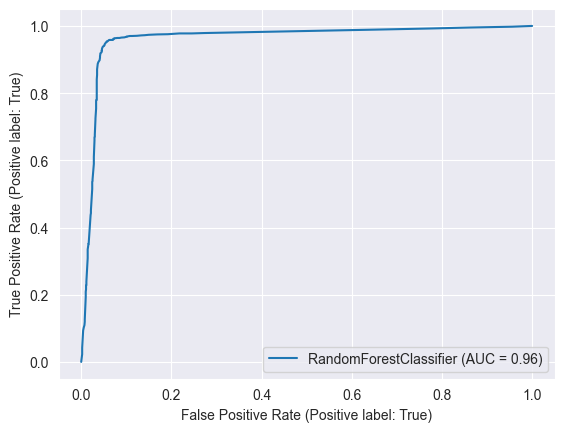

In [155]:
rfc1 = RocCurveDisplay.from_estimator(best_est1, bX, by)
plt.show()

### Parameters: third try

In [160]:
p2 = {"criterion": ["gini","entropy"],"n_estimators": [50,75,100] ,"max_features": ["sqrt", "log2"], "max_depth": [10,20,25,28], "max_leaf_nodes": [10,20,25,28]}
optimisation2 = GridSearchCV(forest_clf, p2, cv=5, scoring="roc_auc")
result2 = optimisation2.fit(aX,ay.values)

In [161]:
score2 = pd.DataFrame(optimisation2.cv_results_)
score2.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.059902,0.404419,0.010646,0.001814,gini,10,sqrt,10,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.953311,0.958436,0.955944,0.951319,0.962226,0.956247,0.003835,169
1,1.036062,0.046320,0.012207,0.001078,gini,10,sqrt,10,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.954138,0.958212,0.955522,0.950473,0.963069,0.956283,0.004212,161
2,1.343158,0.032543,0.014882,0.000701,gini,10,sqrt,10,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.954305,0.958291,0.955789,0.950546,0.963109,0.956408,0.004186,153
3,0.774509,0.009299,0.010053,0.000666,gini,10,sqrt,20,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955330,0.962359,0.957227,0.952511,0.962889,0.958063,0.004018,113
4,1.158338,0.019647,0.012341,0.000477,gini,10,sqrt,20,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955539,0.961285,0.957435,0.952178,0.964131,0.958114,0.004209,85
5,1.528977,0.038731,0.014729,0.000596,gini,10,sqrt,20,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.956178,0.961301,0.957950,0.952045,0.964644,0.958423,0.004311,41
6,1.050749,0.256826,0.014853,0.007367,gini,10,sqrt,25,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955684,0.963214,0.957449,0.952351,0.962592,0.958258,0.004136,57
7,1.519747,0.583050,0.012719,0.000800,gini,10,sqrt,25,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955889,0.962307,0.957389,0.952094,0.962927,0.958121,0.004061,83
8,1.605514,0.014438,0.015475,0.000400,gini,10,sqrt,25,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.956486,0.962208,0.957879,0.952177,0.963920,0.958534,0.004184,31
9,0.839829,0.030540,0.009712,0.000571,gini,10,sqrt,28,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.954970,0.962724,0.957449,0.952996,0.962835,0.958195,0.004001,75


In [162]:
optimisation2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=28,
                       n_estimators=50, random_state=42)

In [163]:
best_est2 = optimisation2.best_estimator_
best_est2 = best_est2.fit(aX, ay.values)
predicted2 = best_est2.predict(bX)

In [164]:
print(f"Accuracy: {accuracy_score(by, predicted2)}")
print(f"Precision: {precision_score(by, predicted2)}")
print(f"Recall: {recall_score(by, predicted2)}")

Accuracy: 0.9434206272227611
Precision: 0.946752486834406
Recall: 0.9506462984723855


### Cross validation on training data

In [165]:
scores2 = cross_val_score(best_est2, aX, ay, cv=5)
scores2

array([0.93039283, 0.93452791, 0.93039283, 0.93659545, 0.94827586])

In [166]:
print(scores2.mean())
print(scores2.var(ddof=1))

0.936036978065068
5.4023053209199844e-05


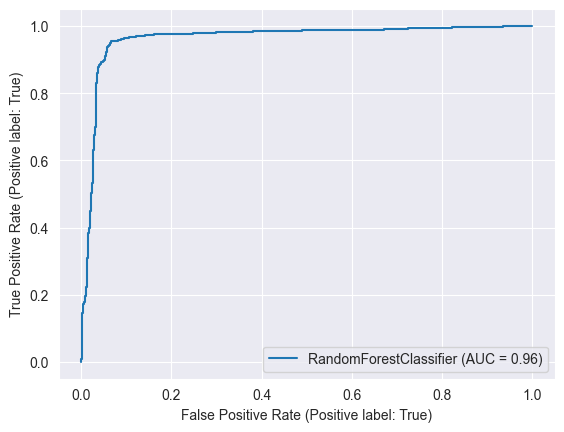

In [167]:
rfc2 = RocCurveDisplay.from_estimator(best_est2, bX, by)
plt.show()

### All three tries are similar

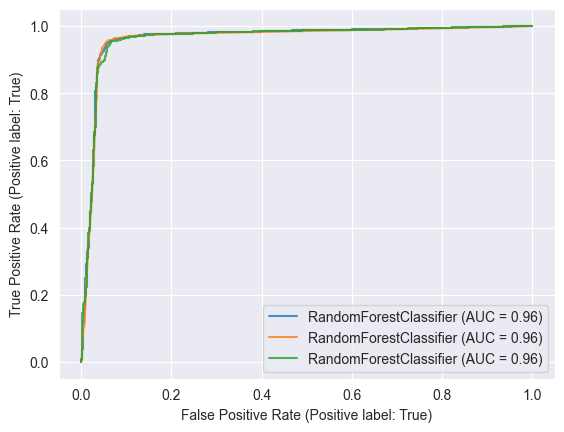

In [172]:
asd = plt.gca()

rfc_0 = RocCurveDisplay.from_estimator(best_est, bX, by, ax=asd, alpha=0.8)
rfc_1 = RocCurveDisplay.from_estimator(best_est1, bX, by, ax=asd, alpha=0.8)
rfc_2 = RocCurveDisplay.from_estimator(best_est2, bX, by, ax=asd, alpha=0.8)

plt.show()

## Evaluation of the impact of the selected solution strategy on the classification

### Classification Accuracy

- Data transformation
- Attribute selection and machine learning algorithm selection
- Hyperparameter tuning - ensemble learning.
- Best model - data pipeline

### Data transformation

### Using: PowerTransformer, Normalizer, MinMaxScaler and Random forest

In [197]:
pipeline_all = Pipeline(steps=[("transformer", PowerTransformer()), ("normalizer", Normalizer()), ("scaler", MinMaxScaler()), ("model", forest_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_all.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()),
                ('normalizer', Normalizer()), ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [198]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_all.score(new_testX, new_testy)

0.9450371807306822

### Using: PowerTransformer, Normalizer and Random forest

In [201]:
pipeline_2 = Pipeline(steps=[("transformer", PowerTransformer()), ("normalizer", Normalizer()), ("model", forest_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_2.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()),
                ('normalizer', Normalizer()),
                ('model', RandomForestClassifier(random_state=42))])

In [202]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_2.score(new_testX, new_testy)

0.9450371807306822

- Without the MinMaxScaler the Accuracy stayed the same

### Using: Normalizer, MinMaxScaler and Random forest

In [184]:
pipeline_3 = Pipeline(steps=[("scaler", MinMaxScaler()), ("normalizer", Normalizer()), ("model", forest_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_3.fit(newX, newy)

Pipeline(steps=[('scaler', MinMaxScaler()), ('normalizer', Normalizer()),
                ('model', RandomForestClassifier(random_state=42))])

In [186]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_3.score(new_testX, new_testy)

0.94180407371484

- Without the PowerTransformer the Accuracy is lower

### Using: PowerTransformer, MinMaxScaler and Random forest

In [199]:
pipeline_4 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", forest_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_4.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [200]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_4.score(new_testX, new_testy)

0.9498868412544456

- Without the Normalizer the Accuracy is higher

### Attribute selection and machine learning algorithm selection

### Using: KNN

In [203]:
pipeline_5 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", knn_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_5.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier())])

In [204]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_5.score(new_testX, new_testy)

0.8781118655027481

### Using: Decision Tree

In [205]:
pipeline_6 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", tree_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_6.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier(random_state=42))])

In [206]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_6.score(new_testX, new_testy)

0.8920142256708697

### Using Random Forest

In [207]:
pipeline_7 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", forest_clf)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_7.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [208]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_7.score(new_testX, new_testy)

0.9498868412544456

### From the 3 classifiers the Random Forest Classifier is the best because of its Accuracy, although it has a bit slower runtime

### Hyperparameter tuning - ensemble learning.

In [209]:
pipeline_8 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", best_est2)])

#display(pipeline_2)
newX = training.loc[:,training.columns!="ack"]
newy = training.loc[:,training.columns=="ack"]
pipeline_8.fit(newX, newy)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_leaf_nodes=28, n_estimators=50,
                                        random_state=42))])

In [210]:
new_testX = test.loc[:,test.columns!="ack"]
new_testy = test.loc[:,test.columns=="ack"]
pipeline_8.score(new_testX, new_testy)

0.9434206272227611

### Testing if results are better with Hyperparameter tuning

In [212]:
p2 = {"criterion": ["gini","entropy"],"n_estimators": [50,75,100] ,"max_features": ["sqrt", "log2"], "max_depth": [10,20,25,28], "max_leaf_nodes": [10,20,25,28]}
optimisation2 = GridSearchCV(forest_clf, p2, cv=5, scoring="roc_auc")
result__ = optimisation2.fit(pipeline.transform(aX),ay.values)

In [213]:
optimisation2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=28,
                       n_estimators=50, random_state=42)

In [214]:
best_est3 = optimisation2.best_estimator_
best_est3 = best_est3.fit(aX, ay.values)
predicted3 = best_est3.predict(bX)

In [215]:
print(f"Accuracy: {accuracy_score(by, predicted3)}")
print(f"Precision: {precision_score(by, predicted3)}")
print(f"Recall: {recall_score(by, predicted3)}")

Accuracy: 0.9434206272227611
Precision: 0.946752486834406
Recall: 0.9506462984723855


### The Random forest without the Hyperparameter tuning has higher Accuracy, but the max_depth was 34
### We will choose the Random forest with the Hyperparameter where the max_depth is 20

In [218]:
pipeline_9 = Pipeline(steps=[("transformer", PowerTransformer()), ("scaler", MinMaxScaler()), ("model", best_est3)])

display(pipeline_9)

Pipeline(steps=[('transformer', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_leaf_nodes=28, n_estimators=50,
                                        random_state=42))])